#Introducción
---
TFM: Aplicación de ciencia de datos en el sector de producción animal para la predicción y explicación de óptimos en ganado porcino.

*Titulo*: **Estimador anterior de GMD**

*Autor*: **Jose Eduardo Cámara Gómez**

---

## Importar paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
from google.colab import files
# Cargamos el fichero del dataset gmd_02.csv
uploaded = files.upload()
# Leemos el fichero csv con los datos
df = pd.read_csv('gmd_02.csv', sep=';')

df['EntradaFinal'] = pd.to_datetime(df.EntradaFinal, format='%Y-%m-%d')

prediccion_GMD = df[(df['EntradaInicial'] > '2020-01-01')].groupby('ct_raza')['GMD'].mean()

Saving gmd_02.csv to gmd_02.csv


# Graficamos la Estimación

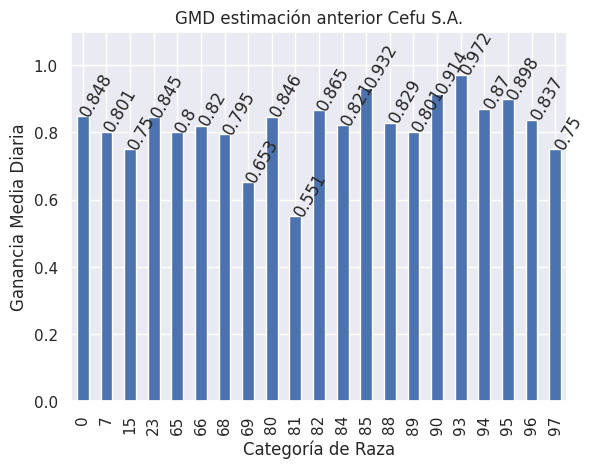

In [3]:
# Graficamos los valores de la estimación
ax = prediccion_GMD.plot(kind='bar')
plt.title('GMD estimación anterior Cefu S.A.')
plt.xlabel('Categoría de Raza')
plt.ylabel('Ganancia Media Diaria')
# Añadimos los valores
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=60)
plt.ylim((0,1.1))
plt.show()

# Mostrar errores

Métricas para Antiguo método
Metr.	 Valor			 Descripción
R^2 	 0.5286486159442735 	 (Coeficiente de Determinación)
RMSE	 0.00337753859449682 	 (Raíz de error cuadrático medio)
MAE 	 0.04516631294881286 	 (Error absoluto medio)
MAX 	 0.29088017771168895 	 (Error Máximo)


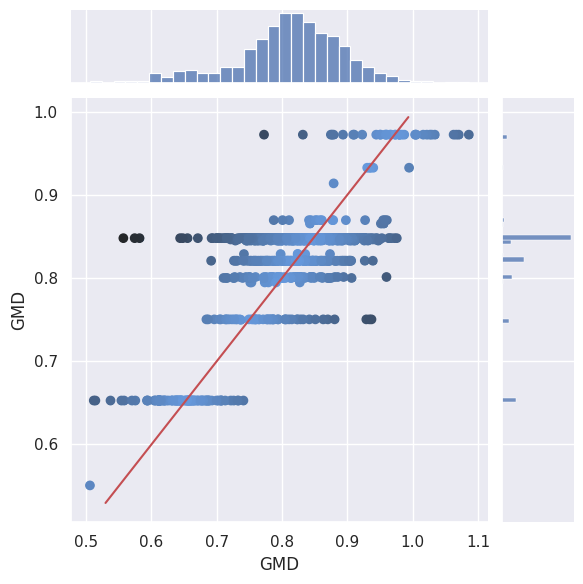

In [4]:
def estima_gmd_old(x):
    return prediccion_GMD[x]


# Predecimos los valores de test
y = df['GMD']
x0 = df[['ct_raza']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x0, y, test_size = 0.2, random_state = 123)
y_pred = X_test.apply(estima_gmd_old); y_pred.index = X_test.index; y_pred.columns=['GMD']; y_pred = y_pred.GMD


# Analizamos otros errores del método
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
# Definimos la función con las métricas a mostrar
def mostrar_metricas(y_test, y_pred):
   print("Metr.\t Valor\t\t\t Descripción")
   print("R^2 \t", r2_score(y_test, y_pred), "\t (Coeficiente de Determinación)")
   print("RMSE\t", mean_squared_error(y_test, y_pred, squared=True), "\t (Raíz de error cuadrático medio)")
   print("MAE \t", mean_absolute_error(y_test, y_pred), "\t (Error absoluto medio)")
   print("MAX \t", max_error(y_test, y_pred), "\t (Error Máximo)")
# Pedimos que muestre las métricas para el modelo de RandomForest
print("Métricas para Antiguo método")
mostrar_metricas(y_test, y_pred)


# Función para Graficar diferencias entre valor predicho y real en datos de test del modelo pasado
def graficoDiferencias(y_test, y_pred):
    diferencia = abs(y_pred - y_test)
    g = sns.jointplot(x=y_test, y=y_pred)
    # Draw a line of x=y
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, '-r')
    g.ax_joint.scatter(x=y_test, y=y_pred, c=diferencia.values, cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True))
    plt.show()
graficoDiferencias(y_test, y_pred)